In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
states = list((x, y) for x in [0, 1] for y in [0, 1])
actions = ["ms", "nms1", "nms2"] # ms: mastered skills, nms1: not mastered skill 1, nms2: not mastered skill 2
# ACTION_PROB = 0.5 # TODO: still not sure what is the ACTION_PROB
# STATE_PROB = 0.5 # TODO: have to figure out what is exactly the STATE_PROB

reward_ms = 1
reward_nms1_imediate = 5
reward_nms2_imediate = 5
reward_nms1_determine = 10
reward_nms2_determine = 10

In [3]:
def start_state(state):
    x, y = state
    if x == 0 and y == 0:
        return True

In [4]:
def acquired_first_skill(state):
    x, y = state
    if (x == 1 and y == 0):
        return True

In [5]:
def acquired_second_skill(state):
    x, y = state
    if (x == 0 and y == 1):
        return True

In [6]:
def is_terminal(state):
    x, y = state
    if (x == 1 and y == 1):
        return True

In [7]:
def step(state, action):
    if action == "ms":
        reward = reward_ms
        next_state = (state)
        
    elif action == "nms1" and start_state(state):
        reward = reward_nms1_imediate
        next_state = (1, 0)
            
    elif action == "nms2" and start_state(state):
        reward = reward_nms2_imediate
        next_state = (0, 1)
    
    elif acquired_first_skill(state):
        reward = reward_nms2_determine
        next_state = (1, 1)
        
    elif acquired_second_skill(state):
        reward = reward_nms1_determine
        next_state = (1, 1)
            
    else: 
        raise ValueError
        
            
    return next_state, reward

In [8]:
def expected_returns(state, action, state_value):
    i, j = state
    new_state_value = state_value.copy()
    (next_i, next_j), reward = step(state, actions[action])
    new_state_value[i, j] = reward + new_state_value[next_i, next_j]
    return new_state_value[i, j]      

In [9]:
policy = np.zeros((len(states), len(actions)))
                  
for i in range(len(states)):                
                  
    if start_state(states[i]):
        for action, act_prob in enumerate(policy[i]):
            policy[i][action] = 1/3
    if states[i] == (1, 0):
        policy[i][0] = 1/2
        policy[i][2] = 1/2
    if states[i] == (0, 1):
        policy[i][0] = 1/2
        policy[i][1] = 1/2

In [10]:
def policy_evaluation(policy):
    state_value = np.zeros((2, 2))
    new_state_value = state_value.copy()
    
    iteration = 1
    
#     state_value_iterations = []
#     state_value_iterations.append(state_value)
    
    while True:
        for i in range(len(states)):
            
            if is_terminal(states[i]):
                continue
                
            new_state_value[states[i]] = 0
            
            for action, action_prob in enumerate(policy[i]):
                (next_i, next_j), reward = step(states[i], actions[action])
                new_state_value[states[i]] += action_prob*(reward + new_state_value[next_i, next_j])
        
        value_change = np.sum(np.abs(state_value - new_state_value))
        print("value_change in: {}".format(value_change))
        if value_change < 1e-4:
            state_value = new_state_value.copy()
            break
        
        
        state_value = new_state_value.copy()
#         state_value_iterations.append(state_value)
        iteration += 1
    
    return state_value    

In [11]:
state_value= policy_evaluation(policy)
state_value

value_change in: 14.666666666666666
value_change in: 3.666666666666668
value_change in: 0.0


array([[7.33333333, 5.5       ],
       [5.5       , 0.        ]])

In [12]:
def policy_iteration():
    # inital random policy
    policy = np.zeros((len(states), len(actions)))
                  
    for i in range(len(states)):                

        if start_state(states[i]):
            for action, act_prob in enumerate(policy[i]):
                policy[i][action] = 1/3
        if states[i] == (1, 0):
            policy[i][0] = 1/2
            policy[i][2] = 1/2
        if states[i] == (0, 1):
            policy[i][0] = 1/2
            policy[i][1] = 1/2
            
    while True:
    
        policy_stable = True

        state_value = policy_evaluation(policy)
        
        policy_change_count = 0
        for i in range(len(states)):
            if is_terminal(states[i]):
                continue
            chosen_a = np.argmax(policy[i])
            action_returns = []
            for action, act_prob in enumerate(policy[i]):
                action_returns.append(act_prob*expected_returns(states[i], action, state_value))
            print(action_returns)
            best_action = np.argmax(action_returns)
            if best_action != chosen_a:
                print(f"best action: {best_action}, chosen action: {chosen_a} in state {states[i]}")
                policy_change_count += 1
                policy[i] = np.eye(len(actions))[best_action]
                policy_stable = False
        print("policy change in {} states".format(policy_change_count))
        if policy_stable:
            return policy, state_value

In [13]:
policy, state_value = policy_iteration()

value_change in: 14.666666666666666
value_change in: 3.666666666666668
value_change in: 0.0
[2.7777777777777777, 3.5, 3.5]
best action: 1, chosen action: 0 in state (0, 0)
[3.25, 5.0, 0.0]
best action: 1, chosen action: 0 in state (0, 1)
[3.25, 0.0, 5.0]
best action: 2, chosen action: 0 in state (1, 0)
policy change in 3 states
value_change in: 25.0
value_change in: 10.0
value_change in: 0.0
[0.0, 15.0, 0.0]
[0.0, 10.0, 0.0]
[0.0, 0.0, 10.0]
policy change in 0 states


In [14]:
np.save('state_value', state_value)

In [22]:
policy

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [15]:
import matplotlib.pyplot as plt

In [16]:
from mpl_toolkits.mplot3d import Axes3D

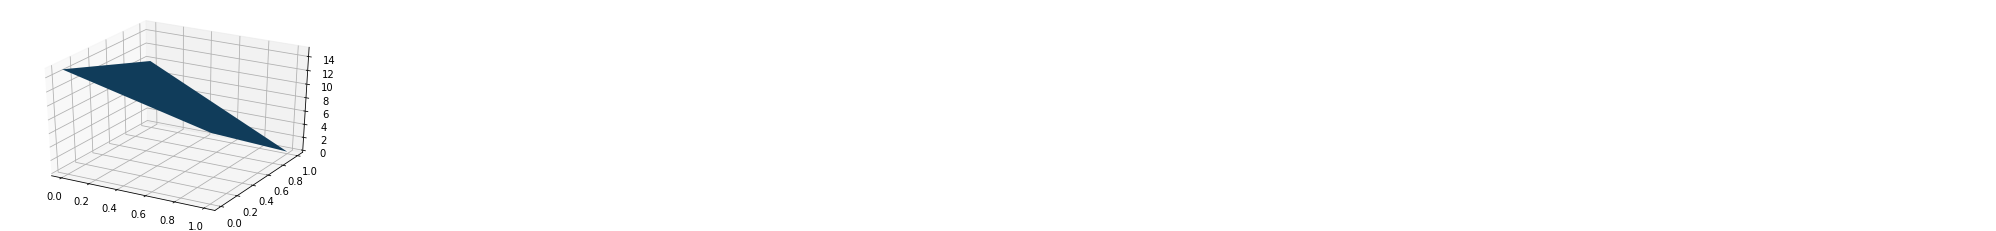

In [17]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(2)
y = np.arange(2)
x, y = np.meshgrid(x, y)
z = state_value
surface = ax.plot_surface(x, y, z)

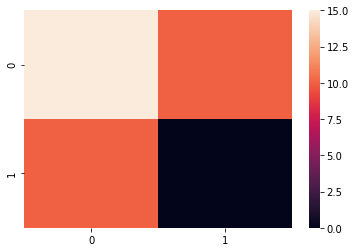

In [35]:
import seaborn as sns
fig = sns.heatmap(np.flipud(state_value))

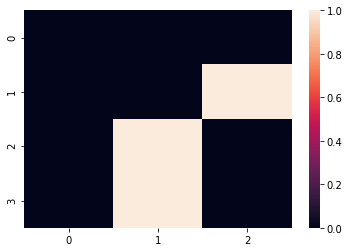

In [23]:
fig = sns.heatmap(np.flipud(policy))

In [30]:
y = list(map(lambda x: x + 1, [1, 2, 3, 4]))

[2, 3, 4, 5]

In [33]:
from functools import reduce
y = reduce((lambda x, y: x*y), [1, 2, 3, 4])
y

24

In [34]:
y = list(filter(lambda x: x<0, [-1, 2, -5, 3]))
y

[-1, -5]